## Animal Images Classifying


The image dataset contains 3000 images of different resolutions organised in 3 categories - cats, dogs and pandas . The dataset is uniformly distributed with 1000 samples for each class.


### Import Libraries

In [13]:
import os
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Convolution2D,MaxPooling2D


In [14]:
path = "./Data/animals/animals/"
batch_size= 16
img_height = 32
img_width = 55
validation_split=0.2

### Use full Function

In [26]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [15]:

devices = tf.config.list_physical_devices()
print(devices)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


### Picture Shape

In [16]:

for dirname, _, filenames in os.walk(path):
    print(dirname)

./Data/animals/animals/
./Data/animals/animals/dogs
./Data/animals/animals/cats
./Data/animals/animals/panda


In [17]:
print('Total cats images:', len(os.listdir(path + 'cats')))
print('Total dogs images:', len(os.listdir(path + 'dogs')))
print('Total pandas images:', len(os.listdir(path + 'panda')))

Total cats images: 1000
Total dogs images: 1000
Total pandas images: 1000


### Picture shape

In [18]:

categories = ['dogs', 'panda', 'cats']

shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

dogs  => height min :  50 width min :  59
dogs  => height max :  500 width max :  500
panda  => height min :  87 width min :  78
panda  => height max :  1200 width max :  1600
cats  => height min :  32 width min :  55
cats  => height max :  500 width max :  500


The minimum image dimensions ia (32 x 55) 

### Pre-processing

We normalise the images by dividing the values by 255, so that value of the samples are scaled between the range 0 and 1

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                validation_split= validation_split )

In [23]:
train_generator = train_datagen.flow_from_directory(path,
                                                   target_size= (img_height, img_width),
                                                    batch_size= batch_size,
                                                    class_mode = 'categorical',
                                                    classes= ['dogs', 'panda', 'cats'],
                                                    subset = 'training',
                                                    shuffle= True)

Found 2400 images belonging to 3 classes.


In [24]:
validation_generator = train_datagen.flow_from_directory(path,
                                                        target_size = (img_height, img_width),
                                                        batch_size= batch_size,
                                                        class_mode = 'categorical',
                                                        subset = 'validation',
                                                        classes= ['dogs', 'panda', 'cats'],
                                                        shuffle= True)

Found 600 images belonging to 3 classes.


In [27]:
imgs, labels= next(train_generator)

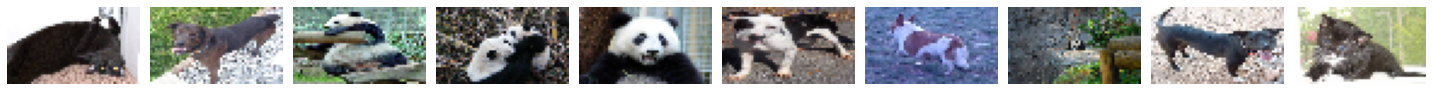

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [28]:
plotImages(imgs)
print(labels)

### Baseline Model 

In [29]:
baseline_model = Sequential()

baseline_model.add(Convolution2D(32,(3,3), activation = 'relu',padding="same",
                    input_shape=(img_height, img_width, 3)))
baseline_model.add((MaxPooling2D(pool_size=(2,2))))


baseline_model.add(Convolution2D(32,(3,3), activation='relu',padding="same"))
baseline_model.add((MaxPooling2D(pool_size=(2,2))))


baseline_model.add(Flatten())
baseline_model.add(Dense(128, activation='relu'))


baseline_model.add(Dense(3,activation='softmax'))


baseline_model.compile(loss= 'categorical_crossentropy',
optimizer= 'adam', metrics=['accuracy'])


print(baseline_model.summary())


2022-05-04 13:07:09.679221: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 55, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 27, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 13, 32)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3328)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [36]:
history=baseline_model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=25,
                    verbose=2,
                    batch_size= batch_size
                    )

Epoch 1/25
150/150 [==============================] - 17s 110ms/step - loss: 1.9347e-05 - accuracy: 1.0000 - val_loss: 2.7000 - val_accuracy: 0.6983
Epoch 2/25
150/150 [==============================] - 15s 101ms/step - loss: 1.7471e-05 - accuracy: 1.0000 - val_loss: 2.7292 - val_accuracy: 0.6983
Epoch 3/25
150/150 [==============================] - 16s 105ms/step - loss: 1.5752e-05 - accuracy: 1.0000 - val_loss: 2.7376 - val_accuracy: 0.7000
Epoch 4/25
150/150 [==============================] - 15s 100ms/step - loss: 1.4275e-05 - accuracy: 1.0000 - val_loss: 2.7593 - val_accuracy: 0.6983
Epoch 5/25
150/150 [==============================] - 26s 173ms/step - loss: 1.2957e-05 - accuracy: 1.0000 - val_loss: 2.7766 - val_accuracy: 0.7000
Epoch 6/25
150/150 [==============================] - 20s 135ms/step - loss: 1.1742e-05 - accuracy: 1.0000 - val_loss: 2.8016 - val_accuracy: 0.6967
Epoch 7/25
150/150 [==============================] - 26s 172ms/step - loss: 1.0827e-05 - accuracy: 1.0000

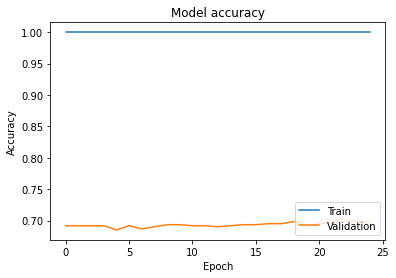

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

val-ccuracy: 0.7333 Epoc =9